In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.layers import Dense
from keras.models import Sequential

from sklearn import preprocessing
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import warnings
from sklearn.metrics import ConfusionMatrixDisplay
import string
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')

2023-08-02 16:56:04.886280: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
X_train = pd.read_csv("train_text.csv")
X_test = pd.read_csv("test_text.csv")
y_train = pd.read_csv("train_target.csv")
y_test = pd.read_csv("test_target.csv")

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shengshuyue/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [10]:
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [11]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            pos = pos_tag([i.strip()])
            word = lemmatizer.lemmatize(i.strip(),get_simple_pos(pos[0][1]))
            final_text.append(word.lower())
    return " ".join(final_text)

In [12]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/shengshuyue/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shengshuyue/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/shengshuyue/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [22]:
X_train.text = X_train.text.apply(lemmatize_words)
X_test.text = X_test.text.apply(lemmatize_words)

<AxesSubplot:xlabel='fraudulent', ylabel='count'>

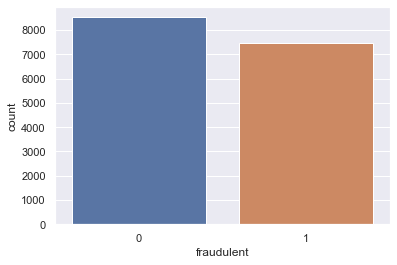

In [23]:
sns.set(style="darkgrid")
sns.countplot(x = "fraudulent" , data = y_train)

In [28]:
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(X_train.text)
#transformed test reviews
cv_test_reviews=cv.transform(X_test.text)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (15992, 1581000)
BOW_cv_test: (4008, 1581000)


In [29]:
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(X_train.text)
#transformed test reviews
tv_test_reviews=tv.transform(X_test.text)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (15992, 1581000)
Tfidf_test: (4008, 1581000)


#### MultinomialNB

In [30]:
#training the model
mnb=MultinomialNB(alpha = 10)
#fitting the nb for bag of words
mnb_bow=mnb.fit(cv_train_reviews,y_train)
print(mnb_bow)
#fitting the nb for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,y_train)
print(mnb_tfidf)

MultinomialNB(alpha=10)
MultinomialNB(alpha=10)


In [31]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)

In [32]:
y_pred = mnb.predict_proba(cv_test_reviews)[:, 1]
cv_auc = roc_auc_score(y_test, y_pred)
cv_auc

0.9860187067060022

In [33]:
tn, fp, fn, tp = confusion_matrix(y_test, mnb_bow_predict).ravel()
cv_ber = 0.5 * (fp / (fp + tn) + fn / (fn + tp))
cv_ber

0.1830499468650372

In [34]:
accuracy_score(mnb_bow_predict,y_test)

0.8280938123752495

In [35]:
y_pred = mnb.predict_proba(tv_test_reviews)[:, 1]
tv_auc = roc_auc_score(y_test, y_pred)
tv_auc

0.9858090160484583

In [36]:
tn, fp, fn, tp = confusion_matrix(y_test, mnb_tfidf_predict).ravel()
tv_ber = 0.5 * (fp / (fp + tn) + fn / (fn + tp))
tv_ber

0.48352816153028694

In [37]:
accuracy_score(mnb_tfidf_predict,y_test)

0.5459081836327345

#### knn

In [38]:
#training the model
knn=KNeighborsClassifier(n_neighbors=3, leaf_size = 20)
#fitting the nb for bag of words
knn_bow=knn.fit(cv_train_reviews,y_train)
print(knn_bow)
#fitting the nb for tfidf features
knn_tfidf=knn.fit(tv_train_reviews,y_train)
print(knn_tfidf)

KNeighborsClassifier(leaf_size=20, n_neighbors=3)
KNeighborsClassifier(leaf_size=20, n_neighbors=3)


In [39]:
knn_bow_predict=knn.predict(cv_test_reviews)
#Predicting the model for tfidf features
knn_tfidf_predict=knn.predict(tv_test_reviews)

In [40]:
y_pred = knn.predict_proba(cv_test_reviews)[:, 1]
cv_auc = roc_auc_score(y_test, y_pred)
cv_auc

0.808799859639722

In [41]:
y_pred = knn.predict_proba(tv_test_reviews)[:, 1]
tv_auc = roc_auc_score(y_test, y_pred)
tv_auc

0.5726716839134525

In [42]:
tn, fp, fn, tp = confusion_matrix(y_test, knn_bow_predict).ravel()
ber = 0.5 * (fp / (fp + tn) + fn / (fn + tp))
ber

0.3539815732147802

In [43]:
tn, fp, fn, tp = confusion_matrix(y_test, knn_tfidf_predict).ravel()
ber = 0.5 * (fp / (fp + tn) + fn / (fn + tp))
ber

0.4995296331138288

In [44]:
accuracy_score(knn_bow_predict,y_test)

0.6245009980039921

In [45]:
accuracy_score(knn_tfidf_predict,y_test)

0.47005988023952094

#### Neural Network

In [46]:
nn=MLPClassifier()
#fitting the nb for bag of words
nn_bow=nn.fit(cv_train_reviews,y_train)
print(nn_bow)
#fitting the nb for tfidf features
nn_tfidf=nn.fit(tv_train_reviews,y_train)
print(nn_tfidf)

MLPClassifier()
MLPClassifier()


In [47]:
nn_bow_predict=nn.predict(cv_test_reviews)
#Predicting the model for tfidf features
nn_tfidf_predict=nn.predict(tv_test_reviews)

In [48]:
y_pred = nn.predict_proba(cv_test_reviews)[:, 1]
cv_auc = roc_auc_score(y_test, y_pred)
cv_auc

0.8505899080560202

In [49]:
y_pred = nn.predict_proba(tv_test_reviews)[:, 1]
tv_auc = roc_auc_score(y_test, y_pred)
tv_auc

0.8518203098523118

In [50]:
tn, fp, fn, tp = confusion_matrix(y_test, nn_bow_predict).ravel()
ber = 0.5 * (fp / (fp + tn) + fn / (fn + tp))
ber

0.4108132398531215

In [51]:
tn, fp, fn, tp = confusion_matrix(y_test, nn_tfidf_predict).ravel()
ber = 0.5 * (fp / (fp + tn) + fn / (fn + tp))
ber

0.4891815616180621

In [52]:
nn_bow_score=accuracy_score(y_test,nn_bow_predict)
print("nn_bow_score :",nn_bow_score)
#Accuracy score for tfidf features
nn_tfidf_score=accuracy_score(y_test,nn_tfidf_predict)
print("nn_tfidf_score :",nn_tfidf_score)

nn_bow_score : 0.5643712574850299
nn_tfidf_score : 0.4810379241516966


#### hirebeat test

In [54]:
df2 = pd.read_csv("HireBeat_fake_post.csv")

In [55]:
df2_drop_column = df2[['Job title','Job description','Job location','Job level',
                       'Company type','Company overview','Skills','Education']]

In [56]:
df2_drop_column.fillna(" ",inplace = True)

In [57]:
import pandas as pd
from bs4 import BeautifulSoup

# Function to convert HTML to plain text
def html_to_text(html):
    soup = BeautifulSoup(html, 'html.parser')
    return soup.get_text()

# Apply the function to each cell in the dataframe
df2_drop_column['Job description'] = df2_drop_column['Job description'].apply(html_to_text)
df2_drop_column['Company overview'] = df2_drop_column['Company overview'].apply(html_to_text)

In [58]:
df2_drop_column['fraudulent'] = 1

In [59]:
def array_to_text(data): #Translate json format array into text
    try:
        data = ast.literal_eval(data)
        values = [item.split(":")[1].strip().replace("\'", "").replace('label', '').rstrip(', ') for item in data]
        values = ",".join(values)
        if values =="": return " "
        else: return values
    except: 
        if data =="": return " "
        else: return data

In [60]:
cleaned_df = df2_drop_column

In [61]:
cleaned_df["Skills"]=cleaned_df["Skills"].apply(array_to_text)

In [63]:
def convert_to_plain_string(skill):
    if isinstance(skill, list):
        return ' '.join(skill)
    return skill

# Apply the function to the "Skills" column
cleaned_df['Skills'] = cleaned_df['Skills'].apply(convert_to_plain_string)

In [64]:
data = cleaned_df

In [65]:
data['text'] = data['Job description'] + ' ' + data['Company overview'] + ' ' + data['Skills'] + ' ' + data['Job title'] + ' ' + data['Job location'] + ' ' + data['Company type'] + ' ' +data['Job level'] + ' ' + data['Education']

In [66]:
del data['Job description']
del data['Company overview']
del data['Skills']
del data['Job title']
del data['Job location']
del data['Company type']
del data['Job level']
del data['Education']

In [67]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shengshuyue/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [68]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [86]:
data.text = data.text.apply(lemmatize_words)

<AxesSubplot:xlabel='fraudulent', ylabel='count'>

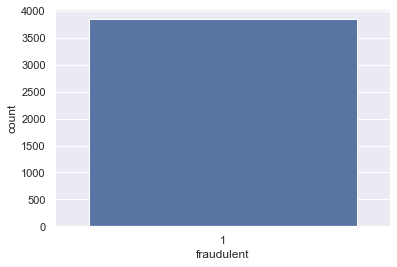

In [87]:
sns.set(style="darkgrid")
sns.countplot(x = "fraudulent" , data = data)

In [103]:
data

,fraudulent,text
0,0,passionate technology thrive fast-paced enviro...
1,1,large healthcare marketing communication netwo...
2,1,"hire immediately bilingual (japanese, german, ..."
3,1,"concrete master inc., much success attribute s..."
4,1,look experienced result-driven digital marketi...
...,...,...
3841,1,must apply website apply here: remote work hom...
3842,1,must apply website apply here: remote work hom...
3843,1,must apply website apply here: remote work hom...
3844,1,must apply website apply here: remote work hom...


In [127]:
data.loc[0, "fraudulent"] = 0
data.loc[89, "fraudulent"] = 0

In [89]:
def remove_website_links(text):
    # Define a regular expression pattern to match URLs
    pattern = r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"
    return re.sub(pattern, "", text)

# Apply the remove_website_links function to the 'text' column
data['text'] = data['text'].apply(remove_website_links)

In [90]:
X_test = data.text

In [128]:
y_test = data.fraudulent

In [92]:
X_test

0       passionate technology thrive fast-paced enviro...
1       large healthcare marketing communication netwo...
2       hire immediately bilingual (japanese, german, ...
3       concrete master inc., much success attribute s...
4       look experienced result-driven digital marketi...
                              ...                        
3841    must apply website apply here: remote work hom...
3842    must apply website apply here: remote work hom...
3843    must apply website apply here: remote work hom...
3844    must apply website apply here: remote work hom...
3845    look master multi-tasker excellent communicati...
Name: text, Length: 3846, dtype: object

In [95]:
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(X_train.text)
#transformed test reviews
cv_test_reviews=cv.transform(X_test)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (15992, 1581000)
BOW_cv_test: (3846, 1581000)


In [96]:
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(X_train.text)
#transformed test reviews
tv_test_reviews=tv.transform(X_test)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (15992, 1581000)
Tfidf_test: (3846, 1581000)


#### mnb

In [100]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)

In [129]:
y_pred = mnb.predict_proba(cv_test_reviews)[:, 1]
cv_auc = roc_auc_score(y_test, y_pred)
cv_auc

0.8579604578563995

In [130]:
tn, fp, fn, tp = confusion_matrix(y_test, mnb_bow_predict).ravel()
cv_ber = 0.5 * (fp / (fp + tn) + fn / (fn + tp))
cv_ber

0.3558792924037461

In [131]:
accuracy_score(mnb_bow_predict,y_test)

0.28861154446177845

In [132]:
cm_cv = confusion_matrix(y_test,mnb_bow_predict)
cm_cv

array([[   2,    0],
       [2736, 1108]])

In [133]:
cm_cv = pd.DataFrame(cm_cv, index=[0,1], columns=[0,1])
cm_cv.index.name = 'Actual'
cm_cv.columns.name = 'Predicted'

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

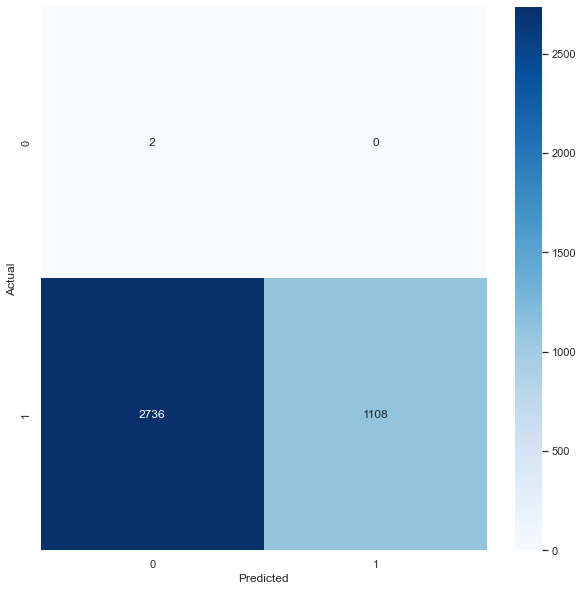

In [134]:
plt.figure(figsize = (10,10))
sns.heatmap(cm_cv,cmap= "Blues",annot = True, fmt='')

In [135]:
y_pred = mnb.predict_proba(tv_test_reviews)[:, 1]
tv_auc = roc_auc_score(y_test, y_pred)
tv_auc

0.8573100936524454

In [136]:
tn, fp, fn, tp = confusion_matrix(y_test, mnb_tfidf_predict).ravel()
tv_ber = 0.5 * (fp / (fp + tn) + fn / (fn + tp))
tv_ber

0.49440686784599375

In [137]:
accuracy_score(mnb_tfidf_predict,y_test)

0.01170046801872075

#### knn

In [114]:
knn_bow_predict=knn.predict(cv_test_reviews)
#Predicting the model for tfidf features
knn_tfidf_predict=knn.predict(tv_test_reviews)

In [138]:
y_pred = knn.predict_proba(cv_test_reviews)[:, 1]
cv_auc = roc_auc_score(y_test, y_pred)
cv_auc

0.4981789802289282

In [139]:
y_pred = knn.predict_proba(tv_test_reviews)[:, 1]
tv_auc = roc_auc_score(y_test, y_pred)
tv_auc

0.5

In [140]:
tn, fp, fn, tp = confusion_matrix(y_test, knn_bow_predict).ravel()
ber = 0.5 * (fp / (fp + tn) + fn / (fn + tp))
ber

0.5

In [141]:
tn, fp, fn, tp = confusion_matrix(y_test, knn_tfidf_predict).ravel()
ber = 0.5 * (fp / (fp + tn) + fn / (fn + tp))
ber

0.5

In [142]:
accuracy_score(knn_bow_predict,y_test)

0.999479979199168

In [143]:
accuracy_score(knn_tfidf_predict,y_test)

0.999479979199168

In [144]:
cm_cv = confusion_matrix(y_test,knn_bow_predict)
cm_tv = confusion_matrix(y_test,knn_tfidf_predict)

In [145]:
cm_cv = pd.DataFrame(cm_cv, index=[0,1], columns=[0,1])
cm_cv.index.name = 'Actual'
cm_cv.columns.name = 'Predicted'
cm_tv = pd.DataFrame(cm_tv, index=[0,1], columns=[0,1])
cm_tv.index.name = 'Actual'
cm_tv.columns.name = 'Predicted'

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

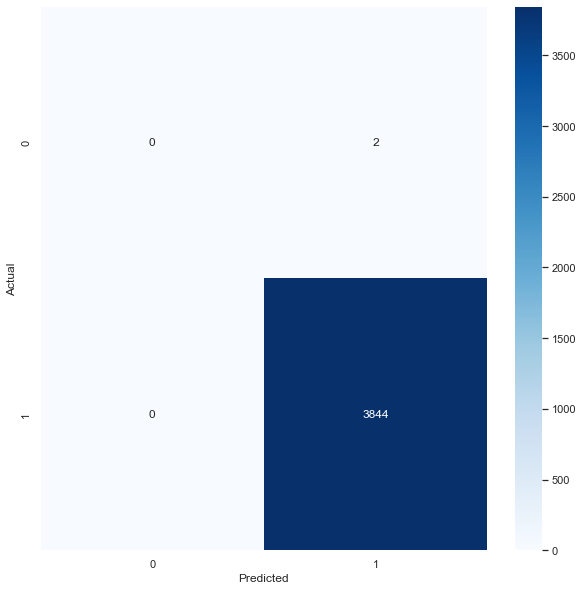

In [146]:
plt.figure(figsize = (10,10))
sns.heatmap(cm_cv,cmap= "Blues",annot = True, fmt='')

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

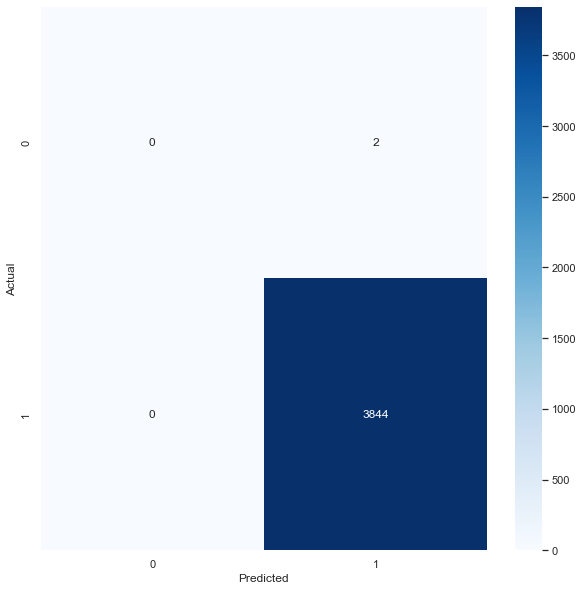

In [147]:
plt.figure(figsize = (10,10))
sns.heatmap(cm_tv,cmap= "Blues",annot = True, fmt='')

### Bert Model

In [3]:
balanced_data = pd.read_csv("sampled_data.csv")

In [4]:
balanced_data['text']

0        Building great professional social networks is...
1        (We have more than 1500+ Job openings in our w...
2        We exist inquisitory for adenine web couturier...
3        We are Netguru and we love to develop network ...
4        We be looking to rent adenine dynamic data ent...
                               ...                        
19995    Desired Skills and Experience:BA/BS in Compute...
19996    virtual adjunct job province react to electron...
19997    put drumhead basic datum entrance clerk want -...
19998    Play with kids, get paid for it Love travel? J...
19999    Government funding is only available for 16-18...
Name: text, Length: 20000, dtype: object

In [6]:
target = balanced_data['fraudulent']
text = balanced_data[balanced_data.columns[-1]]

In [7]:
%%time
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


# Applying the cleaning function to both test and training datasets
text = text.apply(lambda x: clean_text(x))
text.head(3)

CPU times: user 7.41 s, sys: 84.2 ms, total: 7.49 s
Wall time: 7.56 s


0    building great professional social networks is...
1    we have more than  job openings in our website...
2    we exist inquisitory for adenine web couturier...
Name: text, dtype: object

In [8]:
%%time
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

# appling tokenizer5
text = text.apply(lambda x: tokenizer.tokenize(x))
text.head(3)

CPU times: user 1.93 s, sys: 177 ms, total: 2.11 s
Wall time: 2.19 s


0    [building, great, professional, social, networ...
1    [we, have, more, than, job, openings, in, our,...
2    [we, exist, inquisitory, for, adenine, web, co...
Name: text, dtype: object

In [9]:
%%time
stop_words = stopwords.words('english')
def remove_stopwords(text):
    """
    Removing stopwords belonging to english language
    
    """
    words = [w for w in text if w not in stop_words]
    return words


text = text.apply(lambda x : remove_stopwords(x))

CPU times: user 10.2 s, sys: 94 ms, total: 10.3 s
Wall time: 10.4 s


In [10]:
%%time
def combine_text(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

text = text.apply(lambda x : combine_text(x))
text.head(3)

CPU times: user 200 ms, sys: 22.7 ms, total: 223 ms
Wall time: 233 ms


0    building great professional social networks to...
1    job openings website relevant job feel free se...
2    exist inquisitory adenine web couturier battle...
Name: text, dtype: object

### use 6000 records

In [11]:
batch_1 = text[:6000]
target_1 = target[:6000]
target_1.value_counts()


0    3214
1    2786
Name: fraudulent, dtype: int64

In [12]:
# importing the tools 
import torch
import transformers as ppb
import warnings
from sklearn.metrics import f1_score, roc_auc_score
warnings.filterwarnings('ignore')

In [13]:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [14]:
%%time
# Tokenization
tokenized = batch_1.apply((lambda x: tokenizer.encode(x, max_length = 60, add_special_tokens=True)))
tokenized.shape

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


CPU times: user 40.6 s, sys: 115 ms, total: 40.7 s
Wall time: 41.5 s


(6000,)

In [15]:
# Padding ==> convert 1D array to 2D array
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
np.array(padded).shape

(6000, 60)

In [16]:
# Masking ==>  ignore (mask) the padding we've added
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(6000, 60)

In [17]:
%%time
# Deep Learning

input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

last_hidden_states[0].shape

CPU times: user 15min 57s, sys: 18min 28s, total: 34min 25s
Wall time: 44min 34s


torch.Size([6000, 60, 768])

In [18]:
features = last_hidden_states[0][:,0,:].numpy()
labels = target_1

#### Train Test Split

In [19]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [20]:
%%time
# train default para
penalties = ["l1", 'l2', 'none']
solvers = ['liblinear', 'lbfgs', 'sag','newton-cg']
Cs = [0, 0.3, 0.7, 1]
AUC = []
for penalty in penalties:
    for solver in solvers:
        for c in Cs:
            try:
                if penalty == 'none' and c != 0: pass
                else:
                    lr_clf = LogisticRegression(penalty=penalty, C=c, solver='lbfgs', max_iter=100)
                    lr_clf.fit(train_features, train_labels)
                    predictions = lr_clf.predict(test_features)
                    predictions = np.round(predictions).astype(int)
                    auc = np.round(roc_auc_score(test_labels, predictions),5)
                    AUC.append(auc)
                    print("penalty:", penalty, "\nSolver:", solver, "\nAUC:", auc, "\nC=", c, '\n')
            except:
                pass

penalty: l2 
Solver: liblinear 
AUC: 0.89158 
C= 0.3 

penalty: l2 
Solver: liblinear 
AUC: 0.8983 
C= 0.7 

penalty: l2 
Solver: liblinear 
AUC: 0.89804 
C= 1 

penalty: l2 
Solver: lbfgs 
AUC: 0.89158 
C= 0.3 

penalty: l2 
Solver: lbfgs 
AUC: 0.8983 
C= 0.7 

penalty: l2 
Solver: lbfgs 
AUC: 0.89804 
C= 1 

penalty: l2 
Solver: sag 
AUC: 0.89158 
C= 0.3 

penalty: l2 
Solver: sag 
AUC: 0.8983 
C= 0.7 

penalty: l2 
Solver: sag 
AUC: 0.89804 
C= 1 

penalty: l2 
Solver: newton-cg 
AUC: 0.89158 
C= 0.3 

penalty: l2 
Solver: newton-cg 
AUC: 0.8983 
C= 0.7 

penalty: l2 
Solver: newton-cg 
AUC: 0.89804 
C= 1 

penalty: none 
Solver: liblinear 
AUC: 0.90207 
C= 0 

penalty: none 
Solver: lbfgs 
AUC: 0.90207 
C= 0 

penalty: none 
Solver: sag 
AUC: 0.90207 
C= 0 

penalty: none 
Solver: newton-cg 
AUC: 0.90207 
C= 0 

CPU times: user 9.3 s, sys: 393 ms, total: 9.7 s
Wall time: 5.39 s


In [36]:
# Reduce the scope and evaluate the performance
for solver in solvers:
    lr_clf = LogisticRegression(penalty='none', C=0.6, solver=solver, max_iter=100)
    try:
        lr_clf.fit(train_features, train_labels)
        predictions = lr_clf.predict(test_features)
        predictions = np.round(predictions).astype(int)
        auc = np.round(roc_auc_score(test_labels, predictions),5)
        tn, fp, fn, tp = confusion_matrix(test_labels, predictions).ravel()
        ber = 0.5 * (fp / (fp + tn) + fn / (fn + tp))
        accu = np.sum(test_labels == predictions)/len(test_labels)
        print("Solver:", solver, "\nAUC:", auc, '\nber:', ber, '\naccuracy:',accu,'\n')
    except: print("Solver",solver, "does not support none penalty")

Solver liblinear does not support none penalty
Solver: lbfgs 
AUC: 0.90207 
ber: 0.09793171654626762 
accuracy: 0.904 

Solver: sag 
AUC: 0.90476 
ber: 0.09524423804609564 
accuracy: 0.9066666666666666 

Solver: newton-cg 
AUC: 0.85898 
ber: 0.14101737186102511 
accuracy: 0.8586666666666667 

